#First tut

In [1]:
import torch

In [2]:
x=torch.empty(2,3)
x

tensor([[-8.7131e+29,  4.5377e-41, -8.9896e+29],
        [ 4.5377e-41, -8.9897e+29,  4.5377e-41]])

In [3]:
x=torch.rand(2,2)
print(x)

tensor([[0.2598, 0.6133],
        [0.5480, 0.2610]])


In [4]:
x=torch.zeros(2,2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [5]:
x=torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [6]:
x=torch.ones(2,2,dtype=torch.float16)
print(x.size())

torch.Size([2, 2])


In [7]:
x=torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [8]:
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
z=x*y
z=torch.add(x,y)
print(z)

tensor([[0.8041, 0.7547],
        [0.0627, 0.2813]])
tensor([[0.7922, 0.0489],
        [0.8227, 0.3605]])
tensor([[1.5963, 0.8036],
        [0.8854, 0.6418]])


In [9]:
y.add_(x)
print(y)#inplace

tensor([[1.5963, 0.8036],
        [0.8854, 0.6418]])


In [10]:
z=x-y
z=torch.sub(x,y)
print(z)

tensor([[-0.7922, -0.0489],
        [-0.8227, -0.3605]])


In [11]:
z=x-y
z=torch.mul(x,y)#elementwise multiplication
print(z)

tensor([[1.2836, 0.6064],
        [0.0555, 0.1805]])


In [12]:
z=torch.div(x,y)#elementwise
print(z)

tensor([[0.5037, 0.9392],
        [0.0708, 0.4383]])


In [13]:
x=torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,1])
print(x[1,1].item())

tensor([[0.3757, 0.6567, 0.5530],
        [0.9452, 0.1693, 0.6243],
        [0.2695, 0.1435, 0.4435],
        [0.7510, 0.2189, 0.0314],
        [0.8247, 0.4564, 0.6685]])
tensor([0.3757, 0.9452, 0.2695, 0.7510, 0.8247])
tensor(0.1693)
0.1692989468574524


In [14]:
x=torch.rand(4,4)
print(x)
y=x.view(16)
print(y)
y=x.view(-1,8)#-1 automatic
print(y)

tensor([[0.1906, 0.2744, 0.8242, 0.9165],
        [0.3902, 0.5975, 0.9544, 0.4461],
        [0.2894, 0.7043, 0.0571, 0.6582],
        [0.3248, 0.9508, 0.8135, 0.2023]])
tensor([0.1906, 0.2744, 0.8242, 0.9165, 0.3902, 0.5975, 0.9544, 0.4461, 0.2894,
        0.7043, 0.0571, 0.6582, 0.3248, 0.9508, 0.8135, 0.2023])
tensor([[0.1906, 0.2744, 0.8242, 0.9165, 0.3902, 0.5975, 0.9544, 0.4461],
        [0.2894, 0.7043, 0.0571, 0.6582, 0.3248, 0.9508, 0.8135, 0.2023]])


In [15]:
import torch
import numpy as np


In [16]:
a=torch.ones(5)
print(a)
b=a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [17]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [18]:
a=np.ones(5)
print(a)
b=torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [19]:
a+=1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [20]:
if torch.cuda.is_available():
  device=torch.device("cuda")
  x=torch.ones(5,device=device)
  y=torch.ones(5)
  y=y.to(device)
  z=x+y
  # print(z)
  z=z.to("cpu")
  print(z)

tensor([2., 2., 2., 2., 2.])


In [21]:
torch.cuda.is_available()

True

In [22]:
x=torch.ones(5,requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# Second Tut

In [23]:
import torch
x=torch.randn(3,requires_grad=True)
print(x)


tensor([0.1014, 0.6859, 0.5666], requires_grad=True)


In [24]:
y=x+2
print(y)
z=y*y*2
print(z)
z=z.mean()
print(z)
z.backward() #dz/dx
print(x.grad)

tensor([2.1014, 2.6859, 2.5666], grad_fn=<AddBackward0>)
tensor([ 8.8317, 14.4286, 13.1752], grad_fn=<MulBackward0>)
tensor(12.1452, grad_fn=<MeanBackward0>)
tensor([2.8019, 3.5813, 3.4222])


In [25]:
z=y*y*2
v=torch.tensor([0.1,1.0,0.01],dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([ 3.6424, 14.3250,  3.5248])


In [26]:
x.requires_grad_(False)
print(x)

tensor([0.1014, 0.6859, 0.5666])


In [27]:
y=x.detach()
print(y)

tensor([0.1014, 0.6859, 0.5666])


In [28]:
with torch.no_grad():
  y=x+2
  print(y)

tensor([2.1014, 2.6859, 2.5666])


In [29]:
weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
  model_output=(weights*3).sum()
  model_output.backward()

  print(weights.grad)
  # weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


# Backpropagation Theory

In [30]:
import torch
x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(1.0,requires_grad=True)

y_hat=w*x
loss=(y_hat-y)**2
print(loss)
loss.backward()
print(w.grad)
#backward pass above
#update weights
#next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


#Gradientg Descent with AutoGrad and Bakckprop

In [31]:
import numpy as np

#f=w*x
#f=2*x

X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0.0

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=10

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  dw=gradient(X,Y,y_pred)

  #update weights
  w-=learning_rate*dw
  if epoch%2 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:0.0
epoch 1: w=1.200, loss=30.00000000
epoch 3: w=1.872, loss=0.76800019
epoch 5: w=1.980, loss=0.01966083
epoch 7: w=1.997, loss=0.00050332
epoch 9: w=1.999, loss=0.00001288
Predictions after training:9.998952


In [32]:
import torch
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  with torch.no_grad():
    w-=learning_rate*w.grad
  w.grad.zero_()
  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


#Pytorch Loss and Optimizer

In [33]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE



# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


In [34]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
model=nn.Linear(input_size,output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:-3.7600951194763184
epoch 1: w=-0.399, loss=55.33649445
epoch 11: w=1.313, loss=1.61599970
epoch 21: w=1.597, loss=0.21539468
epoch 31: w=1.651, loss=0.16905421
epoch 41: w=1.668, loss=0.15833963
epoch 51: w=1.679, loss=0.14910085
epoch 61: w=1.689, loss=0.14042176
epoch 71: w=1.698, loss=0.13224842
epoch 81: w=1.707, loss=0.12455101
epoch 91: w=1.716, loss=0.11730137
Predictions after training:9.430187225341797


In [35]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
# model=nn.Linear(input_size,output_size)


# 1 Design model, input and output size, forward pass
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):  # Corrected: __init__ not _init_
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)


model = LinearRegression(input_size, output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:-1.7090098857879639
epoch 1: w=0.024, loss=41.44714737
epoch 11: w=1.504, loss=1.13685203
epoch 21: w=1.747, loss=0.09017318
epoch 31: w=1.791, loss=0.05955669
epoch 41: w=1.803, loss=0.05543382
epoch 51: w=1.810, loss=0.05219028
epoch 61: w=1.816, loss=0.04915214
epoch 71: w=1.821, loss=0.04629121
epoch 81: w=1.827, loss=0.04359683
epoch 91: w=1.832, loss=0.04105924
Predictions after training:9.662879943847656


#Linear Regression using Pytorch

epoch 1: w=1.367, loss=5745.7114
epoch 11: w=13.310, loss=4253.5723
epoch 21: w=23.484, loss=3175.5444
epoch 31: w=32.154, loss=2395.7856
epoch 41: w=39.542, loss=1831.1553
epoch 51: w=45.841, loss=1421.8879
epoch 61: w=51.211, loss=1124.9575
epoch 71: w=55.791, loss=909.3428
epoch 81: w=59.696, loss=752.6505
epoch 91: w=63.028, loss=638.6953


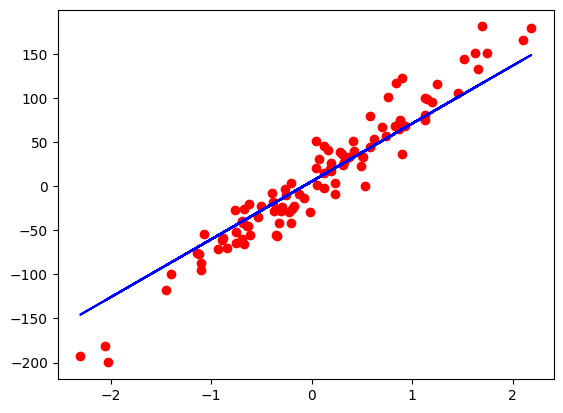

In [36]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(x_numpy.astype(np.float32))
Y=torch.from_numpy(y_numpy.astype(np.float32))
Y=Y.view(Y.shape[0],1)
n_samples,n_features=X.shape
#Model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
criteria=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X)
  loss=criteria(y_predicted,Y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if epoch%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={loss:.4f}')

 #plot
predicted=model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()




#Logistic Regression using Pytorch

In [37]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

n_samples,n_features=X.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

#f=wx+b,sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear=nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

#Model
model=LogisticRegression(n_features)
#Loss and Optimizer
criteria=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X_train)
  loss=criteria(y_predicted,y_train)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: loss={loss:.4f}')

with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')




epoch 10: loss=0.4900
epoch 20: loss=0.4249
epoch 30: loss=0.3796
epoch 40: loss=0.3459
epoch 50: loss=0.3196
epoch 60: loss=0.2984
epoch 70: loss=0.2809
epoch 80: loss=0.2661
epoch 90: loss=0.2533
epoch 100: loss=0.2423
accuracy=0.8947


#Dataset and DataLoader

In [39]:
'''
epoch = 1 forward and backward pass of ALL training samples
batch_size= number of training sample in one forward and backward pass
number of iterations = number of passes,each pass using[batch_size] number of samples
e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
'''

import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    #data loading
    xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
    self.x=torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]])
    self.n_samples=xy.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.n_samples


dataset = WineDataset()
# first_data = dataset[0]
# features,labels = first_data
# print(features,labels)

dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
datatiter=iter(dataloader)
data=next(datatiter)
features,labels=data
print(features,labels)


#training loop
num_epochs=2
total_samples=len(dataset)
n_iterations=math.ceil(total_samples/4)
print(total_samples,n_iterations)
for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(dataloader):
     # forward and backward,update (placeholders for actual model logic)

     # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
     if (i + 1) % 5 == 0: # Print every 5th step
       print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

print("\nTraining loop simulation complete.")

# torchvision.datasets.MNIST()
#fashion=mnist,tifar,coco


tensor([[3.4000e-01, 5.2000e-01, 3.2000e+00, 9.4000e-02, 1.7000e+01, 5.3000e+01,
         1.0014e+00, 3.0500e+00, 8.1000e-01, 9.5000e+00, 6.0000e+00, 2.9400e+02],
        [6.9000e-01, 0.0000e+00, 1.6500e+00, 5.5000e-02, 7.0000e+00, 1.2000e+01,
         9.9162e-01, 3.4700e+00, 5.3000e-01, 1.2900e+01, 6.0000e+00, 9.9900e+02],
        [9.0000e-01, 0.0000e+00, 1.6000e+00, 5.2000e-02, 9.0000e+00, 1.7000e+01,
         9.9467e-01, 3.5000e+00, 6.3000e-01, 1.0900e+01, 6.0000e+00, 1.4550e+03],
        [4.3000e-01, 3.4000e-01, 2.5000e+00, 8.0000e-02, 2.6000e+01, 8.6000e+01,
         9.9870e-01, 3.3800e+00, 6.2000e-01, 9.5000e+00, 6.0000e+00, 4.1000e+02]]) tensor([[13.3000],
        [ 6.4000],
        [ 6.5000],
        [ 9.0000]])
1143 286
epoch 1/2, step 5/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 10/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 15/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 20/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 25/286, inputs

#DataSet Transforms

In [52]:
# import torch
# import torchvision

# # dataset=torchvision.datasets.MNIST(
# #     root='./data',transform=torchvision.transforms.ToTensor()
# # )

# '''
# Transforms can be applied to PIL images,tensors,ndarrays or custom data
# during creation of the Dataset


# On Images:CeterCrop,Grayscale,Pad,RandomAffine,RandomCrop,RandomHorizontalFlip
# ,RandomRotation,Resize,Scale

# On Tensors
# LinearTransformation,Normalize,RandomErasing

# Conversion
# TopIImage: from tensor or ndarray
# ToTensor: from numpy.ndarray or PILImage

# Generic
# Write own class

# Compose Multiple Transform
# composed=transform.Compose([Rescale[256],RandomCrop(224)])
# torchvision.transform.ReScale(256)
# torchvision.transform.ToTensor()
# '''


# '''
# epoch = 1 forward and backward pass of ALL training samples
# batch_size= number of training sample in one forward and backward pass
# number of iterations = number of passes,each pass using[batch_size] number of samples
# e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
# '''

# import torch
# import torchvision
# from torch.utils.data import Dataset,DataLoader
# import numpy as np
# import math

# class WineDataset(Dataset):
#   def __init__(self,transform=None):
#     #data loading
#     xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
#     self.x=torch.from_numpy(xy[:,1:])
#     self.y=torch.from_numpy(xy[:,[0]])
#     self.n_samples=xy.shape[0]

#   def __getitem__(self, index):
#     inputs = self.x[index]
#     targets = self.y[index]

#     sample = {'inputs': inputs, 'targets': targets}

#     if self.transform:
#       sample = self.transform(sample)

#     return sample['inputs'], sample['targets']

#   def __len__(self):
#     return self.n_samples


# class ToTensor:
#   def __call__(self,sample):
#     inputs,targets=sample
#     return torch.from_numpy(inputs),torch.from_numpy(targets)

# class MulTransform:
#   def __init__(self,factor):
#     self.factor=factor

#   def __call__(self,sample):
#     inputs,targets=sample
#     inputs*=self.factor
#     return inputs,targets


# dataset = WineDataset(transform=ToTensor())
# first_data = dataset[0]
# features,labels = first_data
# print(type(features),type(labels))

# composed=torchvision.transforms.Compose([ToTensor(),MulTransform(4)])
# dataset = WineDataset(transform=composed)
# first_data = dataset[0]
# features,labels = first_data
# print(type(features),type(labels))

# #

# # dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
# # datatiter=iter(dataloader)
# # data=next(datatiter)
# # features,labels=data
# # print(features,labels)


# # #training loop
# # num_epochs=2
# # total_samples=len(dataset)
# # n_iterations=math.ceil(total_samples/4)
# # print(total_samples,n_iterations)
# # for epoch in range(num_epochs):
# #   for i,(inputs,labels) in enumerate(dataloader):
# #      # forward and backward,update (placeholders for actual model logic)

# #      # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
# #      if (i + 1) % 5 == 0: # Print every 5th step
# #        print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

# print("\nTraining loop simulation complete.")

# # torchvision.datasets.MNIST()
# #fashion=mnist,tifar,coco



In [53]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self,transform=None):
        #data laoding
        xy = np.loadtxt('/content/WineQT.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])# n_samples,1
        self.n_samples = xy.shape[0]

        self.transform = transform

    def __getitem__(self,index):
        #dataset[0]
        sample = self.x[index], self.y[index]
        if(self.transform):
            sample = self.transform(sample)
        return sample

    def __len__(self):
        #lenght of the dataset
        return self.n_samples


dataset = WineDataset()
dataloader = DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)

#training loop
num_epochs    = 2
total_samples = len(dataset)
n_iterations  = math.ceil(total_samples / 4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
    for i, (inputs,labels) in enumerate(dataloader):
        #forward, backward, update
        if(i + 1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_iterations}, inputs {inputs.shape}')

1143 286
epoch 1/2,step 5/286, inputs torch.Size([4, 12])
epoch 1/2,step 10/286, inputs torch.Size([4, 12])
epoch 1/2,step 15/286, inputs torch.Size([4, 12])
epoch 1/2,step 20/286, inputs torch.Size([4, 12])
epoch 1/2,step 25/286, inputs torch.Size([4, 12])
epoch 1/2,step 30/286, inputs torch.Size([4, 12])
epoch 1/2,step 35/286, inputs torch.Size([4, 12])
epoch 1/2,step 40/286, inputs torch.Size([4, 12])
epoch 1/2,step 45/286, inputs torch.Size([4, 12])
epoch 1/2,step 50/286, inputs torch.Size([4, 12])
epoch 1/2,step 55/286, inputs torch.Size([4, 12])
epoch 1/2,step 60/286, inputs torch.Size([4, 12])
epoch 1/2,step 65/286, inputs torch.Size([4, 12])
epoch 1/2,step 70/286, inputs torch.Size([4, 12])
epoch 1/2,step 75/286, inputs torch.Size([4, 12])
epoch 1/2,step 80/286, inputs torch.Size([4, 12])
epoch 1/2,step 85/286, inputs torch.Size([4, 12])
epoch 1/2,step 90/286, inputs torch.Size([4, 12])
epoch 1/2,step 95/286, inputs torch.Size([4, 12])
epoch 1/2,step 100/286, inputs torch.Size(

# Softmax and Cross - Entropy

In [57]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x=np.array([2.0,1.0,0.1])
outputs=softmax(x)
print('softmax numpy:',outputs)

x=torch.tensor([2.0,1.0,0.1])
outputs=torch.softmax(x,dim=0)
print('softmax torch:',outputs)


def cross_etropy(actual,predicted):
  loss=-np.sum(actual*np.log(predicted))
  return loss
#y must be one hot encoded
#if class 0: [1,0,0]
#if class 1: [0,1,0]
#if class 2: [0,0,1]
#3 classes
Y=np.array([1,0,0])

#y_pred has probabilities
Y_pred_good=np.array([0.7,0.2,0.1])
Y_pred_bad=np.array([0.1,0.3,0.6])
l1=cross_etropy(Y,Y_pred_good)
l2=cross_etropy(Y,Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

#torch
loss=nn.CrossEntropyLoss()
#nn.crossentropy loss applies : nn.LogSoftmax + nn.NLLLoss(Negative Log Likelihood Loss)
#No Softmax in last layer
#Y has class labels, not One Hot!
#Y Pred has raw scores(logits),no Softmax!
#
Y=torch.tensor([0])
#size=n_samples*n_classes=1*3
Y_pred_good=torch.tensor([[2.0,1.0,0.1]])
Y_pred_bad=torch.tensor([[0.5,2.0,0.3]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
print(l1.item())
print(l2.item())

_,predictions1=torch.max(Y_pred_good,1)
_,predicitions2=torch.max(Y_pred_bad,1)
print(predictions1)
print(predicitions2)

#3 samples
Y=torch.tensor([2,0,1])
#size=n_samples*n_classes=1*3
Y_pred_good=torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
Y_pred_bad=torch.tensor([[2.1,1.0,0.1],[0.1,1.0,2.1],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
print(l1.item())
print(l2.item())

_,predictions1=torch.max(Y_pred_good,1)
_,predicitions2=torch.max(Y_pred_bad,1)
print(predictions1)
print(predicitions2)


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])
0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [58]:
import torch
import torch.nn as nn

#Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    return out

model=NeuralNet2(input_size=28*28,hidden_size=5,num_classes=3)
criterion=nn.CrossEntropyLoss() #applies Softmax


In [59]:
import torch
import torch.nn as nn

#Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(hidden_size,1)

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    y_pred=torch.sigmoid(out)
    return y_pred

model=NeuralNet2(input_size=28*28,hidden_size=5,num_classes=2)
criterion=nn.BCELoss() #applies Softmax


# Activation Fuctions

step is very simple and not used in practise
sigmoid is a popular choice and outputs prob  used in last layer of binary classifications
tanh function hyperbolic tanget function outputs value from -1 to 1
used in hidden layers a lot
relu is max(0,x) is most popular for hidden if you don't know which activation to use in hidden layer just use relu
leaky relu is also used to solve the vanishing gradient problem in hidden layers
since in relu if x is less than 0 the value obtained is 0 which leads to gradient becoming 0 further on leading to these weights never being updated these neurons won't learn anything and hence dead so leaky relu is to counter that.
softmax is most populat used for multi class setting

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#option 1 (create nn modules)
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.Relu()
    # nn.Sigmoid
    # nn.Softmax
    # nn.TanH
    # nn.LeakyRelu
    self.linear2=nn.Linear(hidden_size,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

#option 2 use activation functions directly in forward pass
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.linear2=nn.Linear(hidden_size,1)


  def forward(self,x):
    out=torch.relu(self.linear1(x))
    out=torch.sigmoid(self.lineaer2(out))
    # torch.softmax
    # torch.tanh
    #leaky relu in torch.functional module as F.leaky_relu()
    return out


# Fully Feed Forward Neural Network

torch.Size([100, 1, 28, 28]) torch.Size([100])


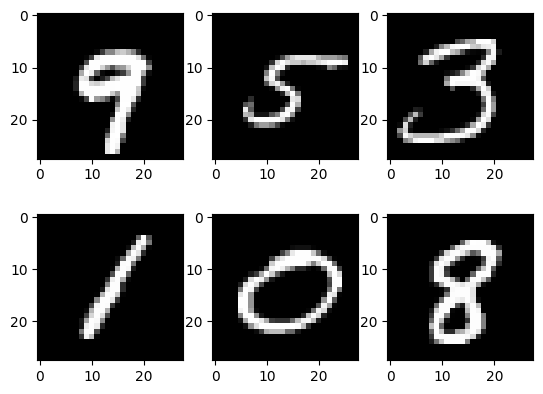

In [1]:
#MNIST
#DataLoader,Transforomation
#Multilayer,Neural Net,activation function
#Loss and Optimizer
#Training Loop(batch training)
#Model evaluation
#GPU Support


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size=784 # 28x28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.001

#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,
        transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,
        transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,
                              shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,
                              shuffle=False)

examples=iter(train_loader)
samples,labels=next(examples)
print(samples.shape,labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')



In [12]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)

    return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)



#loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    #100, 1, 28 ,28
    #100, 784
    images= images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    #forward
    outputs=model(images)
    loss=criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if(i+1)% 100 ==0:
      print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')

#test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)

    _,predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0*n_correct/n_samples
  print(f'accuracy={acc}')




epoch 1/2,step 100/600,loss=0.5696
epoch 1/2,step 200/600,loss=0.5328
epoch 1/2,step 300/600,loss=0.3206
epoch 1/2,step 400/600,loss=0.2718
epoch 1/2,step 500/600,loss=0.2011
epoch 1/2,step 600/600,loss=0.2754
epoch 2/2,step 100/600,loss=0.1857
epoch 2/2,step 200/600,loss=0.2318
epoch 2/2,step 300/600,loss=0.2564
epoch 2/2,step 400/600,loss=0.0818
epoch 2/2,step 500/600,loss=0.2274
epoch 2/2,step 600/600,loss=0.1473
accuracy=95.22
